In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

CARDS = [1,2,3,4,5,6,7,8,9,10]

class Blackjack:
    def __init__(self):
        self.all_states = [(i,j,k) for i in range(12,22) for j in range(1,11) for k in range(0,2)]
        a = [0 for _ in range(len(self.all_states))]
        self.state_value = dict(zip(self.all_states, a))
        self.returns = dict(zip(self.all_states,[[] for _ in range(len(self.all_states))]))


    
    def dealer_policy(self, state):
        # player sticks and now it is the dealer's turn
        s = state[1]
        second = np.random.choice(CARDS)
        if second != 1 and s != 1:
            s += second
        elif second == 1 and s == 1:
            s = 12
        else:
            s = 11 + max(s, second)
        # <17 hit
        while s < 17:
            dealt = np.random.choice(CARDS)
            if dealt == 1 and s + 11 <= 21:
                dealt = 11
            s += dealt
        return s # the final state for dealer

    def player_policy(self, state):
        s = state[0]
        usable_ace = state[2]
        S = [state]
        T = 1
        while s < 20:
            dealt = np.random.choice(CARDS)
            if usable_ace and s + dealt > 21:
               s =  s - 10 + dealt
               usable_ace = 0
            else:
                s += dealt
            if s <= 21:
                S.append((s,state[1],usable_ace))
                T += 1
        return s, S, T

    def run(self, times):
        
        for i in range(times):
            # Generate an episode following pi
            s = self.all_states[np.random.choice(200)]
            s_player, S, T = self.player_policy(s)
            if s_player > 21:
                R = -1
            else:
                s_dealer = self.dealer_policy(s)
                if s_dealer > 21:
                    R = 1
                elif s_player > s_dealer:
                    R = 1
                elif s_player < s_dealer:
                    R = -1
                elif s_dealer == s_dealer:
                    R = 0
           # print(S, T)
            for t in range(T-1,-1,-1):
                #print(S)
                if S[t] not in S[0:t] or t==0:
                    self.returns[S[t]].append(R)
                   # print(self.returns[S[t]])
                    self.state_value[S[t]] = np.mean(self.returns[S[t]])

            

            
                






    



**Run 500,000 episodes.**

In [2]:
agt = Blackjack()
agt.run(500000)

In [3]:
agt.state_value

{(12, 1, 0): -0.34824101796407186,
 (12, 1, 1): -0.03895038950389504,
 (12, 2, 0): -0.3148676946506758,
 (12, 2, 1): 0.07802547770700637,
 (12, 3, 0): -0.3113436740796113,
 (12, 3, 1): 0.006669282071400549,
 (12, 4, 0): -0.29321907600596125,
 (12, 4, 1): 0.058918482647296204,
 (12, 5, 0): -0.29004651162790696,
 (12, 5, 1): 0.034959349593495934,
 (12, 6, 0): -0.3060611747044474,
 (12, 6, 1): 0.06757297081167533,
 (12, 7, 0): -0.3051126992853216,
 (12, 7, 1): 0.0984936268829664,
 (12, 8, 0): -0.27954798073360504,
 (12, 8, 1): 0.08003108003108003,
 (12, 9, 0): -0.28637627432808155,
 (12, 9, 1): 0.03559322033898305,
 (12, 10, 0): -0.3375234521575985,
 (12, 10, 1): -0.024928483857785042,
 (13, 1, 0): -0.3951824053063362,
 (13, 1, 1): -0.0826271186440678,
 (13, 2, 0): -0.38866034698622787,
 (13, 2, 1): -0.003679175864606328,
 (13, 3, 0): -0.38622166696412635,
 (13, 3, 1): 0.004934790271413465,
 (13, 4, 0): -0.3851483389589625,
 (13, 4, 1): -0.008106116433308769,
 (13, 5, 0): -0.3634225759768

In [4]:
x0 = []
y0 = []
z0 = []
x1 = []
y1 = []
z1 = []
for i in agt.state_value.keys():
    if i[2]== 0:
        x0.append(i[0])
        y0.append(i[1])
        z0.append(agt.state_value[i])
    if i[2] == 1:
        x1.append(i[0])
        y1.append(i[1])
        z1.append(agt.state_value[i])

    

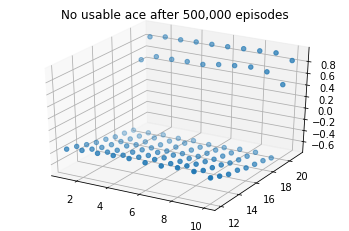

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(y0,x0,z0)
plt.title('No usable ace after 500,000 episodes')
plt.show()

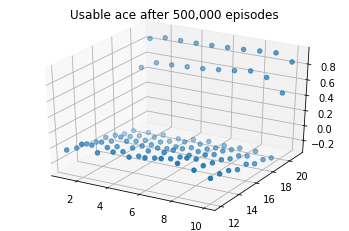

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(y1,x1,z1)
plt.title('Usable ace after 500,000 episodes')
plt.show()

**Run 10,000 episodes.**

In [8]:
agt = Blackjack()
agt.run(10000)

In [9]:
x0 = []
y0 = []
z0 = []
x1 = []
y1 = []
z1 = []
for i in agt.state_value.keys():
    if i[2]== 0:
        x0.append(i[0])
        y0.append(i[1])
        z0.append(agt.state_value[i])
    if i[2] == 1:
        x1.append(i[0])
        y1.append(i[1])
        z1.append(agt.state_value[i])

    

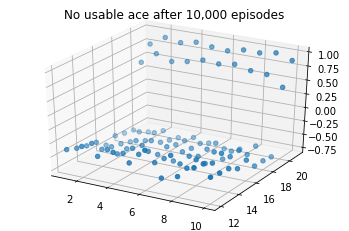

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(y0,x0,z0)
plt.title('No usable ace after 10,000 episodes')
plt.show()

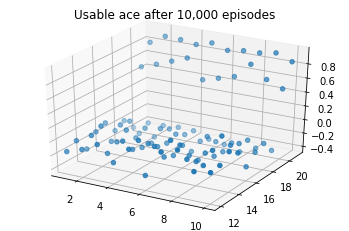

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(y1,x1,z1)
plt.title('Usable ace after 10,000 episodes')
plt.show()